# 모두를 위한 딥러닝 시즌2
##  Lab-09-1 neural nets XOR

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.compat.v1.enable_eager_execution()
tf.compat.v1.set_random_seed(777)  # for reproducibility

print(tf.__version__)

1.14.0


학습에 사용될 데이터를 선언합니다.

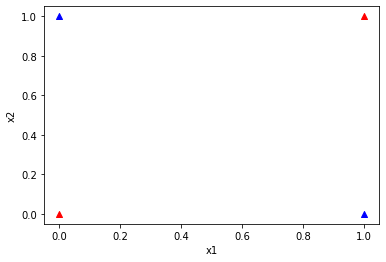

In [38]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Tensorflow의 data API를 이용해 학습할 데이터 x_data, y_data를 같은 형태로 맞춘다.

In [39]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

Weight와 bias를 선언하고 tf.random.normal을 이용해 임의의 값을 넣어준다.
또한, Weight의 shape는 x_data의 shape [4,2]에 맞춘다.

In [40]:
W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

print("W = {}, B = {}".format(W.numpy(), b.numpy()))

W = [[0.7706481 ]
 [0.37335402]], B = [-1.3080608]


sigmoid 함수를 이용해 hypothesis를 정의해준다.

$$
z= Wx + b$$
$$
sigmoid(z)=\frac{1}{1+e^{-z}}$$

In [41]:
def logistic_regression(features):
    
    hypothesis  = tf.sigmoid(tf.matmul(features, W) + b)
    
    return hypothesis

cost 함수를 정의합니다. cross-entry function을 이용한 cost 함수

$$
cost(h(x),y) = -y log(h(x)) - (1 - y) log(1 - h(x))$$

In [42]:
def loss_fn(hypothesis, features, labels):
    
    cost = -tf.reduce_mean(labels * tf.log(logistic_regression(features)) + (1 - labels) * tf.log(1 - hypothesis))
    
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

sigmoid 함수의 결과값을 0.5를 기준으로 0과 1의 값을 리턴합니다.

In [43]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

Gradient descent

In [44]:
def grad(hypothesis, features, labels):
    
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
        
    return tape.gradient(loss_value, [W,b])

학습

In [56]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in tfe.Iterator(dataset):
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
            
            
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))


Iter: 0, Loss: 0.6951
Iter: 100, Loss: 0.6949
Iter: 200, Loss: 0.6948
Iter: 300, Loss: 0.6947
Iter: 400, Loss: 0.6946
Iter: 500, Loss: 0.6945
Iter: 600, Loss: 0.6944
Iter: 700, Loss: 0.6943
Iter: 800, Loss: 0.6942
Iter: 900, Loss: 0.6941
Iter: 1000, Loss: 0.6940
W = [[0.12331725]
 [0.1056624 ]], B = [-0.13581564]
Testset Accuracy: 0.2500
